### 问题一：收集数据并分析中国主要行业之间的相互影响，包括正向促进和负向制约对经济发展的作用

#### 导入numpy、pandas、matplotlib、seaborn的模块

In [1]:
# 导入相关模块
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### 导入对应的各个产业数据

In [3]:
# 导入相关数据
# 示例数据
data = pd.DataFrame({
    'Industry_A': [0.2, 0.3, 0.25, 0.28],
    'Industry_B': [0.15, 0.35, 0.22, 0.30],
    'Industry_C': [0.4, 0.25, 0.30, 0.35]
})


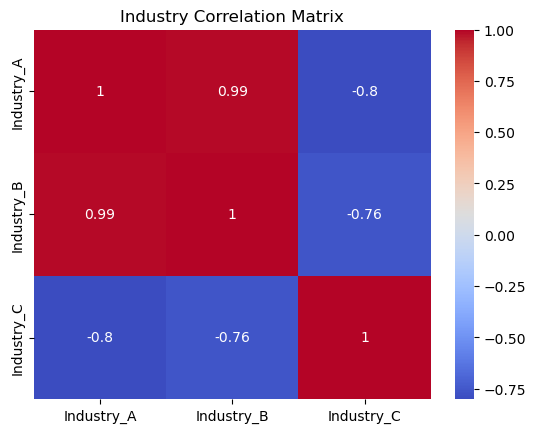

In [4]:
# 1. 相关分析
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Industry Correlation Matrix")
plt.show()

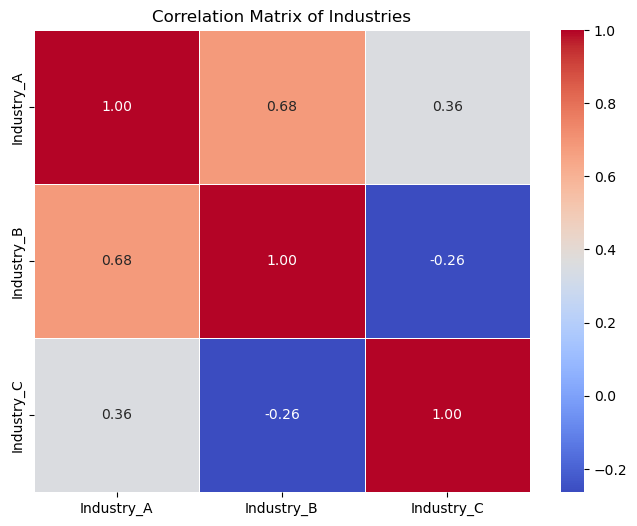

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 构造六种数据情况
data = pd.DataFrame({
    'Industry_A': [0.2, 0.3, 0.25, 0.28, 0.35, 0.4],
    'Industry_B': [0.15, 0.35, 0.22, 0.30, 0.25, 0.32],
    'Industry_C': [0.4, 0.25, 0.30, 0.35, 0.38, 0.45]
})

# 计算相关矩阵
correlation_matrix = data.corr()

# 使用seaborn绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Industries")
plt.show()


In [6]:
from statsmodels.formula.api import ols
# 2. 回归分析
model = ols('Industry_A ~ Industry_B + Industry_C', data=data).fit()
print(model.summary())

# 3. 投入产出分析（假设数据来自投入产出表）
input_output_matrix = np.array([
    [0.4, 0.1, 0.2],  # A对其他产业的投入
    [0.2, 0.5, 0.3],  # B对其他产业的投入
    [0.1, 0.2, 0.4]   # C对其他产业的投入
])

                            OLS Regression Results                            
Dep. Variable:             Industry_A   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     24.63
Date:                Sat, 11 Jan 2025   Prob (F-statistic):              0.141
Time:                        09:46:32   Log-Likelihood:                 15.274
No. Observations:                   4   AIC:                            -24.55
Df Residuals:                       1   BIC:                            -26.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1705      0.071      2.400      0.2

f:\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


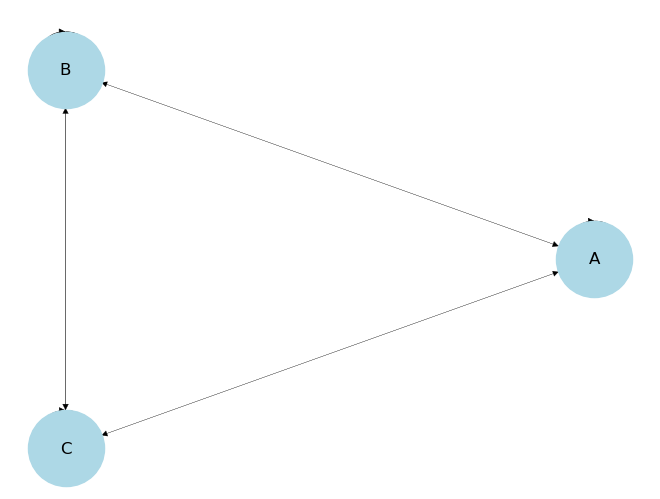

In [7]:
import networkx as nx

# 构建投入产出关系网络
G = nx.DiGraph()
industries = ['A', 'B', 'C']
for i in range(len(industries)):
    for j in range(len(industries)):
        if input_output_matrix[i, j] > 0:
            G.add_edge(industries[i], industries[j], weight=input_output_matrix[i, j])

# 绘图
pos = nx.circular_layout(G)
edges = G.edges(data=True)
weights = [d['weight'] for (_, _, d) in edges]
nx.draw(G, pos, with_labels=True, width=weights, node_color='lightblue', node_size=3000)
plt.show()
